#Portfolio Optimization
Portfolio optimization is a simple optimization problem using the existing financial data. We find out the best combination of assets by calculating the return and risk.


##Cost Function
To solve portfolio optimization we have the cost function like below.

<img src="https://render.githubusercontent.com/render/math?math=E%20%3D%20-%5Csum%5Cmu_ix_i%20%2B%20%5Cgamma%5Csum%5Cdelta_%7Bij%7Dx_ix_j%2BB%5Cleft(%5Csum%20x_i-K%5Cright)%5E2">

The 1st term shows the return of the assets and the 2nd as risk we estimate. The 3rd term is the constaint for the number of assets how many assets we select.

##Example
Now we have an example. Choose 2 assets from 6 possibility.
Here we use dummy data on return and risk.

As a return data we use,

<img src="https://github.com/mdrft/Wildqat/blob/master/examples_ja/img/019_0.png?raw=1">

As a risk data we use,

<img src="https://github.com/mdrft/Wildqat/blob/master/examples_ja/img/019_1.png?raw=1">

First we prepare blueqat and numpy

In [0]:
!pip install -U blueqat

In [0]:
import blueqat.wq as wq
import numpy as np
a = wq.Opt()

First let's think about return. Put return data into the diagonal of the matrix.

In [28]:
ret = wq.diag([-0.026,-0.031,-0.007,-0.022,-0.010,-0.055])
print(ret)

[[-0.026  0.     0.     0.     0.     0.   ]
 [ 0.    -0.031  0.     0.     0.     0.   ]
 [ 0.     0.    -0.007  0.     0.     0.   ]
 [ 0.     0.     0.    -0.022  0.     0.   ]
 [ 0.     0.     0.     0.    -0.01   0.   ]
 [ 0.     0.     0.     0.     0.    -0.055]]


Next we think about risk.

In [0]:
ris = [[0,0.0015,0.0012,0.0018,0.0022,0.0012],[0,0,0.0017,0.0022,0.0005,0.0019],[0,0,0,0.0040,0.0032,0.0024],[0,0,0,0,0.0012,0.0076],[0,0,0,0,0,0.0021],[0,0,0,0,0,0]]

By adding these 2 matrix, we get the final QUBO to calculate.

In [30]:
a.qubo = ret + np.asarray(ris)*0.5
print(a.qubo)

[[-0.026    0.00075  0.0006   0.0009   0.0011   0.0006 ]
 [ 0.      -0.031    0.00085  0.0011   0.00025  0.00095]
 [ 0.       0.      -0.007    0.002    0.0016   0.0012 ]
 [ 0.       0.       0.      -0.022    0.0006   0.0038 ]
 [ 0.       0.       0.       0.      -0.01     0.00105]
 [ 0.       0.       0.       0.       0.      -0.055  ]]


#Constraint for K assets.
Finally we need one more term to make a constraint on the number of assets we choose.
Here we try a simple function which blueqat provide, sel() function to choose 2 from 6.

In [31]:
a.qubo += wq.sel(6,2)
print(a.qubo)

[[-3.026    2.00075  2.0006   2.0009   2.0011   2.0006 ]
 [ 0.      -3.031    2.00085  2.0011   2.00025  2.00095]
 [ 0.       0.      -3.007    2.002    2.0016   2.0012 ]
 [ 0.       0.       0.      -3.022    2.0006   2.0038 ]
 [ 0.       0.       0.       0.      -3.01     2.00105]
 [ 0.       0.       0.       0.       0.      -3.055  ]]


In [39]:
print(a.sa())
print(a.E[-1])

1.5345256328582764
[0, 0, 1, 0, 0, 1]
-4.060799999999999


Finally we get result just 2 assets have value 1 and others has 0.
The assets which has value 1 were selected.

We can also check the time evolution of cost function.

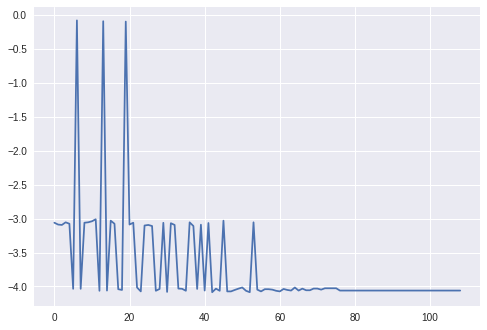

In [40]:
a.plot()